In [1]:
import pandas as pd
import numpy as np
import timeit
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.graph_objs as go
%matplotlib inline



In [66]:
from sklearn.datasets import load_boston

boston = load_boston()
dfFeature = pd.DataFrame(boston.data, columns=boston.feature_names)
dfFeature

dfPrice = pd.DataFrame(boston.target)
dfPrice.columns =['Price']

df = pd.concat([dfFeature,dfPrice], axis=1)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


from keras.datasets import boston_housing

pd.DataFrame(boston_housing.load_data())

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

len(x_train), len(x_test)

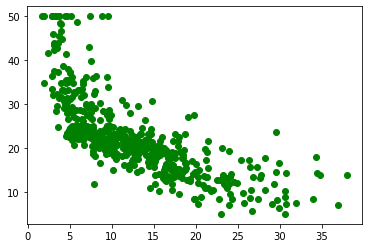

In [24]:

plt.plot(df['LSTAT'], df['Price'], 'o', color='green')

In [25]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.datasets import make_regression
from statsmodels.graphics.regressionplots import abline_plot
import seaborn as sns

In [70]:
model = sm.OLS( df['Price'], df['LSTAT'])
result0 = model.fit()
print(result0.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              410.9
Date:                Fri, 24 Jul 2020   Prob (F-statistic):                    2.71e-67
Time:                        17:33:24   Log-Likelihood:                         -2182.4
No. Observations:                 506   AIC:                                      4367.
Df Residuals:                     505   BIC:                                      4371.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

df.loc[:, df.columns!='Price']

In [112]:
model = sm.OLS(df['Price'], df.loc[:, df.columns!='Price'])
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Fri, 24 Jul 2020   Prob (F-statistic):                        0.00
Time:                        19:16:34   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

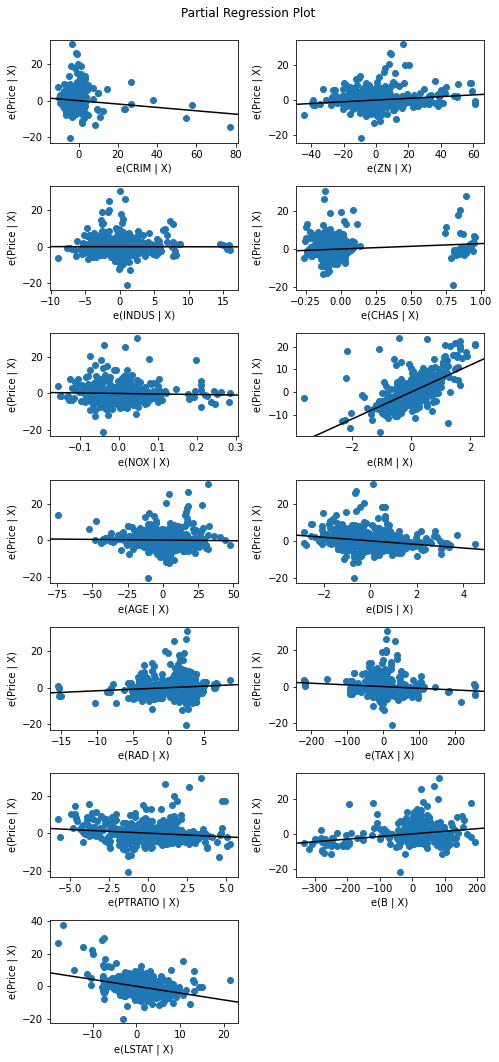

In [72]:
fig = plt.figure(figsize=(7,15))
#plot_partregress <- Plots partial regression for a single regressor.
fig = sm.graphics.plot_partregress_grid(result, fig=fig)

from statsmodels.graphics.regressionplots import abline_plot

ax = plt.subplot()
plt.scatter( df['LSTAT'], df['Price'])#df['Price'], df.loc[:, df.columns!='Price'])
sm.graphics.abline_plot(model_results=result0, ax=ax)

idx = hat > 0.05
plt.scatter(x4[idx], y[idx], s=300, c="r", alpha=0.5)
plt.title("ols regression and leverage")
plt.show()

# Check Leverage 
In statistics and in particular in regression analysis, leverage is a measure of how far away the independent variable values of an observation are from those of the other observations.

High-leverage points are those observations, if any, made at extreme or outlying values of the independent variables such that the lack of neighboring observations means that the fitted regression model will pass close to that particular observation.

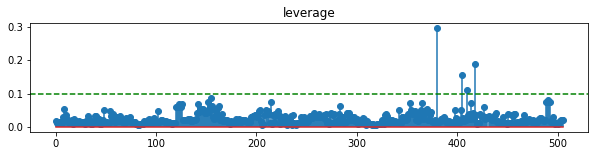

In [73]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat, use_line_collection=True)
plt.axhline(0.1, c="g", ls="--")
plt.title("leverage")
plt.show()

In [37]:
hat.sum()

13.000000000000002

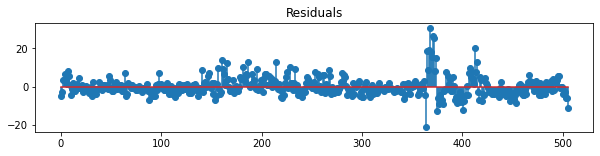

In [38]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid , use_line_collection=True)
plt.title("Residuals")
plt.show()


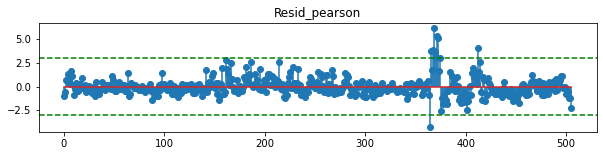

In [39]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson, use_line_collection=True)
plt.axhline(3, c="g", ls="--")
plt.axhline(-3, c="g", ls="--")
plt.title("Resid_pearson")
plt.show()

# Cook's distance (Cook's D)
In statistics, Cook's distance or Cook's D is a commonly used estimate of the influence of a data point 
when performing a least-squares regression analysis.
In a practical ordinary least squares analysis, 
Cook's distance can be used in several ways: 
1. to indicate influential data points that are particularly worth checking for validity; 
2. or to indicate regions of the design space where it would be good to be able to obtain more data points.

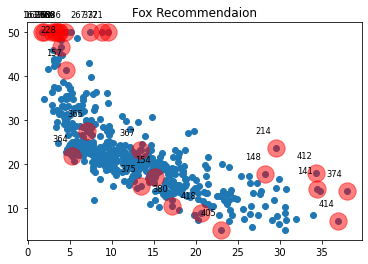

In [41]:
from statsmodels.graphics import utils

cooks_d2, pvals = influence.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(y) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(df['LSTAT'], df['Price'])
plt.scatter(x[idx], y[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx,
                    list(zip(x[idx], y[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.title("Fox Recommendaion")
plt.show()

In [19]:
dfX0 = dfFeature  #df.iloc[:, 0:13]
dfX = sm.add_constant(dfX0)
dfy = dfPrice

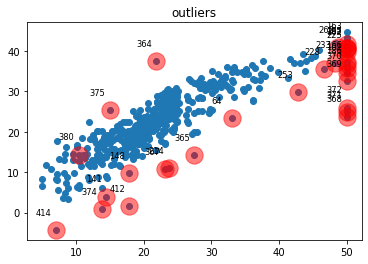

In [65]:
model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()
pred = result_boston.predict(dfX)

influence_boston = result_boston.get_influence()
cooks_d2, pvals = influence_boston.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(y) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]



ax = plt.subplot()
plt.scatter(dfy, pred)
plt.scatter(dfy.Price[idx], pred[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx,
                    list(zip(dfy.Price[idx], pred[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.title("outliers")
plt.show()

# Linear regression using sklearn package

In [113]:
from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression(fit_intercept=False)
line_fitter.fit(df.loc[:, df.columns!='Price'], df['Price'])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [114]:
line_fitter.coef_

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

In [115]:
line_fitter.intercept_

0.0

In [116]:
y_predicted = line_fitter.predict(df.loc[:, df.columns!='Price'])
